## HW3 Problem 3
## Name: Vibhav Jha

### Imports

In [149]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 
import random


### 1. Loading the data



In [3]:
# training images
with open('train-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    train_data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_data = train_data.reshape((size, nrows, ncols))
# training labels
with open('train-labels-idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    train_labels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))

# test images
with open('t10k-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    test_data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_data = test_data.reshape((size, nrows, ncols))

# test labels
with open('t10k-labels-idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    test_labels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))

In [5]:
print('Train Data Shape', np.shape(train_data))

print('Train Label Shape', np.shape(train_labels))

print('Test Data Shape', np.shape(test_data))

print('Test Label Shape', np.shape(test_labels))

Train Data Shape (60000, 28, 28)
Train Label Shape (60000,)
Test Data Shape (10000, 28, 28)
Test Label Shape (10000,)


#### c. Image plots

The labels and images match.


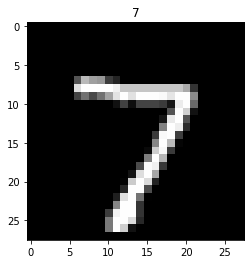

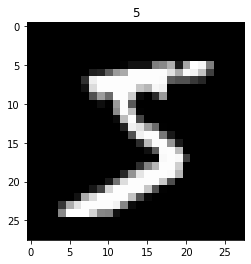

In [10]:
plt.figure(1)
plt.imshow(test_data[0], cmap='gray')
plt.title(test_labels[0])

plt.figure(2)
plt.imshow(train_data[0], cmap='gray')
plt.title(train_labels[0])

print('The labels and images match.')

#### d. Image plot (10x10 grid)

Text(0.5, 0.98, 'Testing Data')

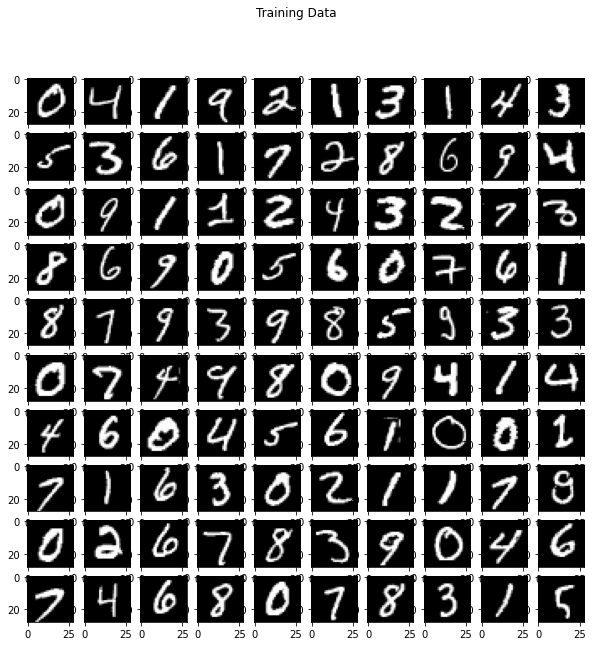

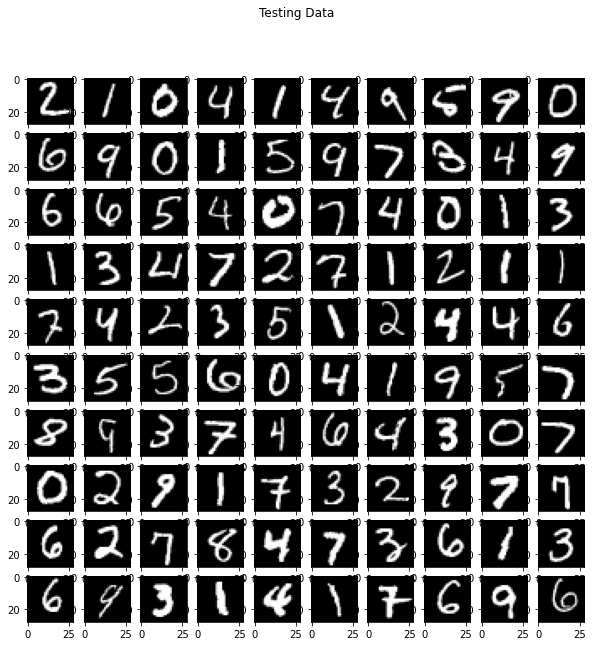

In [15]:
plt.subplots(figsize=(10,10))
for c in range(10):
    for r in range(10):
        a = r*10 + c + 1
        plt.subplot(10,10,a)
        plt.imshow(train_data[a], cmap = 'gray')
plt.suptitle('Training Data')

plt.subplots(figsize=(10,10))
for c in range(10):
    for r in range(10):
        a = r*10 + c + 1
        plt.subplot(10,10,a)
        plt.imshow(test_data[a], cmap = 'gray')
plt.suptitle('Testing Data')


#### e. Digit frequency

In [29]:
trainlab100 = train_labels[:100]
testlab100 = test_labels[:100]
#a = np.where(trainlab100==0)
#print(a)
#np.size(a)

print('Occurences of 0 in the first 100 train labels: ', np.size(np.where(trainlab100==0)))
print('Occurences of 1 in the first 100 train labels: ', np.size(np.where(trainlab100==1)))
print('Occurences of 2 in the first 100 train labels: ', np.size(np.where(trainlab100==2)))
print('Occurences of 3 in the first 100 train labels: ', np.size(np.where(trainlab100==3)))
print('Occurences of 4 in the first 100 train labels: ', np.size(np.where(trainlab100==4)))
print('Occurences of 5 in the first 100 train labels: ', np.size(np.where(trainlab100==5)))
print('Occurences of 6 in the first 100 train labels: ', np.size(np.where(trainlab100==6)))
print('Occurences of 7 in the first 100 train labels: ', np.size(np.where(trainlab100==7)))
print('Occurences of 8 in the first 100 train labels: ', np.size(np.where(trainlab100==8)))
print('Occurences of 9 in the first 100 train labels: ', np.size(np.where(trainlab100==9)))
print('')
print('Occurences of 0 in the first 100 test labels: ', np.size(np.where(testlab100==0)))
print('Occurences of 1 in the first 100 test labels: ', np.size(np.where(testlab100==1)))
print('Occurences of 2 in the first 100 test labels: ', np.size(np.where(testlab100==2)))
print('Occurences of 3 in the first 100 test labels: ', np.size(np.where(testlab100==3)))
print('Occurences of 4 in the first 100 test labels: ', np.size(np.where(testlab100==4)))
print('Occurences of 5 in the first 100 test labels: ', np.size(np.where(testlab100==5)))
print('Occurences of 6 in the first 100 test labels: ', np.size(np.where(testlab100==6)))
print('Occurences of 7 in the first 100 test labels: ', np.size(np.where(testlab100==7)))
print('Occurences of 8 in the first 100 test labels: ', np.size(np.where(testlab100==8)))
print('Occurences of 9 in the first 100 test labels: ', np.size(np.where(testlab100==9)))

Occurences of 0 in the first 100 train labels:  13
Occurences of 1 in the first 100 train labels:  14
Occurences of 2 in the first 100 train labels:  6
Occurences of 3 in the first 100 train labels:  11
Occurences of 4 in the first 100 train labels:  11
Occurences of 5 in the first 100 train labels:  5
Occurences of 6 in the first 100 train labels:  11
Occurences of 7 in the first 100 train labels:  10
Occurences of 8 in the first 100 train labels:  8
Occurences of 9 in the first 100 train labels:  11

Occurences of 0 in the first 100 test labels:  8
Occurences of 1 in the first 100 test labels:  14
Occurences of 2 in the first 100 test labels:  8
Occurences of 3 in the first 100 test labels:  11
Occurences of 4 in the first 100 test labels:  14
Occurences of 5 in the first 100 test labels:  7
Occurences of 6 in the first 100 test labels:  10
Occurences of 7 in the first 100 test labels:  15
Occurences of 8 in the first 100 test labels:  2
Occurences of 9 in the first 100 test labels: 

### 2. Data prepartion
####  Normalization and reshaping

In [296]:
train_labels6 = train_labels[:6000]
train_data6 = train_data[:6000]
print('Occurences of 0 in the first 6000 train labels: ', np.size(np.where(train_labels6==0)))
print('Occurences of 1 in the first 6000 train labels: ', np.size(np.where(train_labels6==1)))
print('Occurences of 2 in the first 6000 train labels: ', np.size(np.where(train_labels6==2)))
print('Occurences of 3 in the first 6000 train labels: ', np.size(np.where(train_labels6==3)))
print('Occurences of 4 in the first 6000 train labels: ', np.size(np.where(train_labels6==4)))
print('Occurences of 5 in the first 6000 train labels: ', np.size(np.where(train_labels6==5)))
print('Occurences of 6 in the first 6000 train labels: ', np.size(np.where(train_labels6==6)))
print('Occurences of 7 in the first 6000 train labels: ', np.size(np.where(train_labels6==7)))
print('Occurences of 8 in the first 6000 train labels: ', np.size(np.where(train_labels6==8)))
print('Occurences of 9 in the first 6000 train labels: ', np.size(np.where(train_labels6==9)))

#scaler = sklearn.preprocessing.MinMaxScaler()
#train_norm = sklearn.preprocessing.MinMaxScaler(train_data6)
#train_norm = scaler.train_data6_
#np.shape(train_norm) this didn't work for some reason, so doing it manually using a for loop
#same story for preprocessing.normalize()

train_data_norm = np.zeros([0,784])
for i in train_data6: #general normalization formula
    train_data_norm = np.vstack((train_data_norm,((i - np.min(i)) / (np.max(i) - np.min((i)))).flatten())) 

train_data_norm = train_data_norm.T #transpose to get ndims x nsamples
print('New Train Data Shape: ',np.shape(train_data_norm))

test_data_norm = np.zeros([0,784])
for ii in test_data:
    test_data_norm = np.vstack((test_data_norm,((ii - np.min(i)) / (np.max(ii) - np.min((ii)))).flatten()))
    
test_data_norm = test_data_norm.T   
print('New Test Data Shape: ',np.shape(test_data_norm))

Occurences of 0 in the first 6000 train labels:  592
Occurences of 1 in the first 6000 train labels:  671
Occurences of 2 in the first 6000 train labels:  581
Occurences of 3 in the first 6000 train labels:  608
Occurences of 4 in the first 6000 train labels:  623
Occurences of 5 in the first 6000 train labels:  514
Occurences of 6 in the first 6000 train labels:  608
Occurences of 7 in the first 6000 train labels:  651
Occurences of 8 in the first 6000 train labels:  551
Occurences of 9 in the first 6000 train labels:  601
New Train Data Shape:  (784, 6000)
New Test Data Shape:  (784, 10000)


#### One-hot encoding of labels

In [297]:
train_int = np.zeros([0,10])

for jj in range(6000):
    train_int = np.vstack((train_int, (np.arange(10) == train_labels[jj].astype(int))))
train_int = train_int.T

print('1-hot encoded Train Labels: ',np.shape(train_int))
print('Train', train_labels[0], ' ', train_int[:,0])

test_int = np.zeros([0,10])
for jj in range(10000):
    test_int = np.vstack((test_int, (np.arange(10) == test_labels[jj].astype(int))))
test_int = test_int.T

print('1-hot encoded Test Labels: ',np.shape(test_int))
print('Test ', test_labels[0], ' ', test_int[:,0])


1-hot encoded Train Labels:  (10, 6000)
Train 5   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1-hot encoded Test Labels:  (10, 10000)
Test  7   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### 3. Neural Network

#### Computational graph

In [62]:
tf.reset_default_graph() #heavily adapted from Michelucci p.110-111 and recitations
#784 as it is 28*28
learning_rate = tf.placeholder(tf.float64, shape=())
X = tf.placeholder(tf.float64, [784, None])
Y = tf.placeholder(tf.float64, [10, None])  

#want 10 neurons, so 10 weights
weights = tf.Variable(tf.random_normal(shape = [10, 784], dtype=tf.float64, seed=12345))

bias = tf.Variable(tf.zeros([10,1], tf.float64))

out = tf.sigmoid(tf.matmul(weights, X) + bias) 

#from Michelucci p108 with the inclusion of the no nan from p77
cost = - tf.reduce_mean(tf.math.multiply_no_nan(Y,tf.log(out)) + tf.math.multiply_no_nan((1-Y),tf.log(1-out)), axis=1 )

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

saver = tf.train.Saver()

#### Training function

In [114]:
def mnist_trainer(epochs, trainx, trainlabels, lrate, costf, optimizerf):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[10], dtype = float)
    for ee in range(epochs):
        [_, cost_] = sess.run([optimizer, cost], feed_dict = {X: trainx, Y:trainlabels, learning_rate:lrate})
        
        cost_history = np.append(cost_history, np.mean(cost_))
        if (ee%500 == 0):
            print('Cost = ', np.mean(cost_), 'at epoch ', ee)
            save_mod = saver.save(sess,'trained_model_' + str(lrate) + '_' + str(epochs) + '.ckpt')
    return sess, cost_history, save_mod


s1, chist1, saved1 = mnist_trainer(epochs = 10001, 
                                   trainx = train_data_norm, 
                                   trainlabels = train_int, 
                                   lrate = 0.05, 
                                   costf = cost, 
                                   optimizerf = optimizer)
s1.close()

s2, chist2, saved2 = mnist_trainer(epochs = 50001, 
                                   trainx = train_data_norm, 
                                   trainlabels = train_int, 
                                   lrate = 0.05, 
                                   costf = cost, 
                                   optimizerf = optimizer)
s2.close()

s3, chist3, saved3 = mnist_trainer(epochs = 50001, 
                                   trainx = train_data_norm, 
                                   trainlabels = train_int, 
                                   lrate = 0.01, 
                                   costf = cost, 
                                   optimizerf = optimizer)
s3.close()

Cost =  2.1182936721476553 at epoch  0
Cost =  0.27998292388249524 at epoch  500
Cost =  0.20307103433352286 at epoch  1000
Cost =  0.17104236086479957 at epoch  1500
Cost =  0.1523633175459273 at epoch  2000
Cost =  0.1397022359518514 at epoch  2500
Cost =  0.13033701063250494 at epoch  3000
Cost =  0.1230082450100857 at epoch  3500
Cost =  0.11704592620593783 at epoch  4000
Cost =  0.11205470319914505 at epoch  4500
Cost =  0.10778404062490321 at epoch  5000
Cost =  0.10406686941551509 at epoch  5500
Cost =  0.10078706993627766 at epoch  6000
Cost =  0.09786095486433724 at epoch  6500
Cost =  0.09522634659131059 at epoch  7000
Cost =  0.09283589400966233 at epoch  7500
Cost =  0.09065277318198824 at epoch  8000
Cost =  0.08864780065633096 at epoch  8500
Cost =  0.08679744633296001 at epoch  9000
Cost =  0.08508244598020351 at epoch  9500
Cost =  0.08348681929148014 at epoch  10000
Cost =  2.1182936721476553 at epoch  0
Cost =  0.27998292388249524 at epoch  500
Cost =  0.2030710343335

Cost =  0.0967712727226265 at epoch  33500
Cost =  0.09624475980595963 at epoch  34000
Cost =  0.09572867409657199 at epoch  34500
Cost =  0.09522265960895707 at epoch  35000
Cost =  0.09472637798499325 at epoch  35500
Cost =  0.0942395073687324 at epoch  36000
Cost =  0.09376174136531926 at epoch  36500
Cost =  0.09329278807674635 at epoch  37000
Cost =  0.09283236920797565 at epoch  37500
Cost =  0.09238021923765997 at epoch  38000
Cost =  0.09193608464828511 at epoch  38500
Cost =  0.09149972321106839 at epoch  39000
Cost =  0.09107090332138318 at epoch  39500
Cost =  0.09064940338085321 at epoch  40000
Cost =  0.09023501122259872 at epoch  40500
Cost =  0.08982752357639552 at epoch  41000
Cost =  0.08942674557077243 at epoch  41500
Cost =  0.0890324902692976 at epoch  42000
Cost =  0.08864457823850709 at epoch  42500
Cost =  0.08826283714511937 at epoch  43000
Cost =  0.08788710138034621 at epoch  43500
Cost =  0.08751721170926555 at epoch  44000
Cost =  0.08715301494336802 at epoc

### 4. Training and testing

#### a. Cost history

Text(0, 0.5, 'Cost')

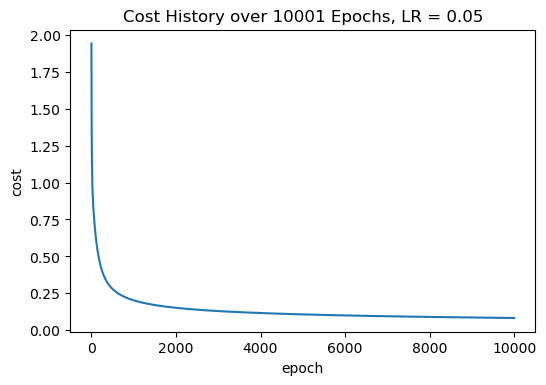

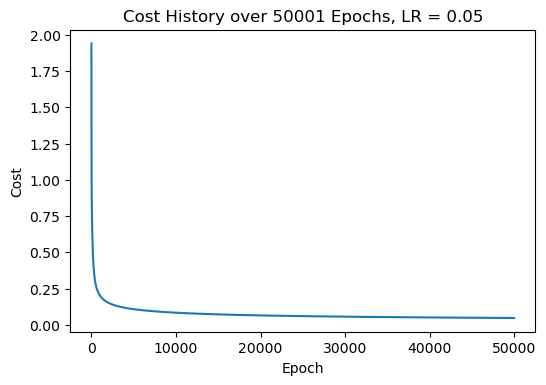

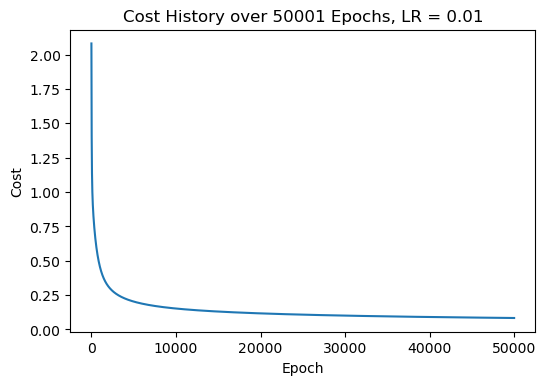

In [295]:
plt.figure()

#print(np.shape(chist1))
plt.plot(chist1[11:])
plt.title('Cost History over 10001 Epochs, LR = 0.05')
plt.xlabel('epoch')
plt.ylabel('cost')


plt.figure()
plt.plot(chist2[11:])
plt.title('Cost History over 50001 Epochs, LR = 0.05')
plt.xlabel('Epoch')
plt.ylabel('Cost')

plt.figure()
plt.plot(chist3[11:])
plt.title('Cost History over 50001 Epochs, LR = 0.01')
plt.xlabel('Epoch')
plt.ylabel('Cost')


#### b. Confusion matrix

INFO:tensorflow:Restoring parameters from trained_model_0.05_10001.ckpt
INFO:tensorflow:Restoring parameters from trained_model_0.05_50001.ckpt
INFO:tensorflow:Restoring parameters from trained_model_0.01_50001.ckpt


<Figure size 600x400 with 0 Axes>

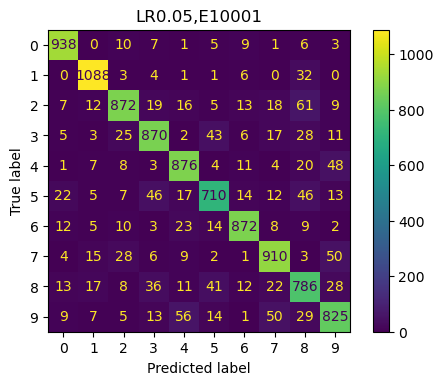

<Figure size 600x400 with 0 Axes>

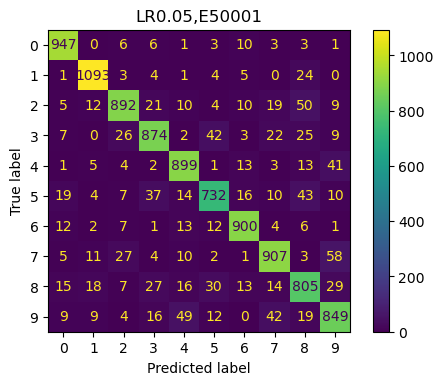

<Figure size 600x400 with 0 Axes>

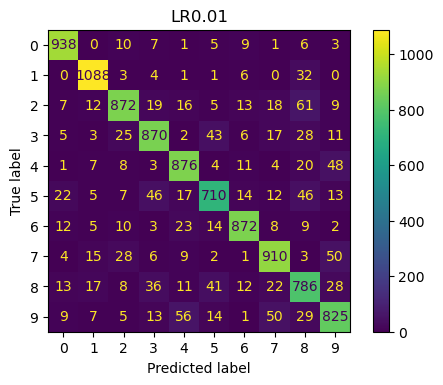

In [299]:
plt.rcParams['figure.dpi'] = 100
sess = tf.Session()
saver.restore(sess, saved1)
ytestout = sess.run(out, {X:test_data_norm})
ytestout = np.argmax(ytestout, axis =0)
cm1 = confusion_matrix(np.argmax(test_int, axis=0), ytestout)
plt.figure()

ConfusionMatrixDisplay(confusion_matrix = cm1).plot()
plt.title('LR0.05,E10001')


sess.close()


sess = tf.Session()
saver.restore(sess, saved2)
ytestout = sess.run(out, {X:test_data_norm})
ytestout = np.argmax(ytestout, axis =0)
cm2 = confusion_matrix(np.argmax(test_int, axis=0), ytestout)
plt.figure()

ConfusionMatrixDisplay(confusion_matrix = cm2).plot()
plt.title('LR0.05,E50001')
sess.close()

sess = tf.Session()
saver.restore(sess, saved3)
ytestout = sess.run(out, {X:test_data_norm})
ytestout = np.argmax(ytestout, axis =0)
cm3 = confusion_matrix(np.argmax(test_int, axis=0), ytestout)
plt.figure()

ConfusionMatrixDisplay(confusion_matrix = cm3).plot()
plt.title('LR0.01')
sess.close()

#### c. Common misclassifications

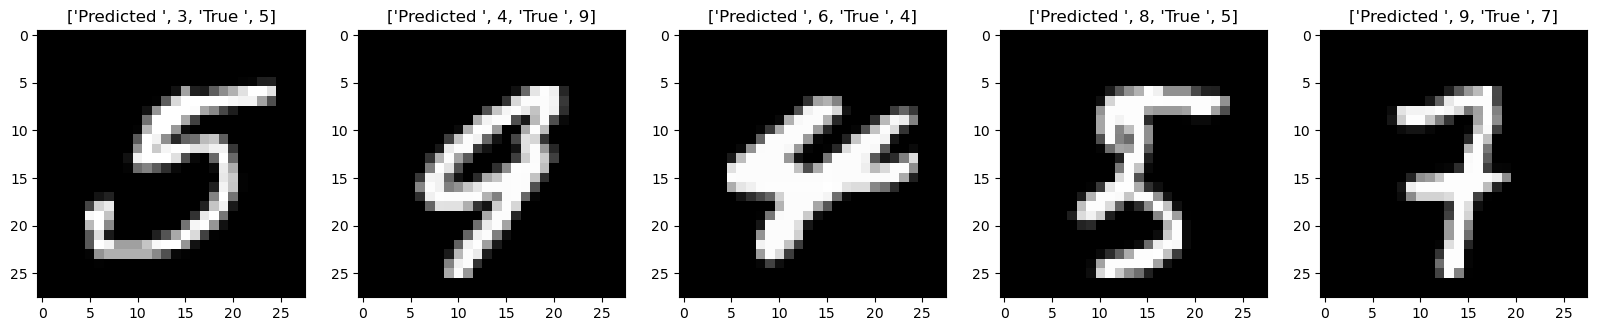

In [293]:
cases = [219, 7580, 6759, 3776, 307]
plt.figure(figsize = (20,20))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(test_data[cases[i]], cmap = 'gray')
    plt.title(['Predicted ', ytestout[cases[i]], 'True ', test_labels[cases[i]]])
    
    

In [294]:
print('9 and 4 can be easily misclassfied as the 9 is not always connected at the top, thus looking like a 4.')
print('5 and 3 are written similarly, however if the upper stem on the five is close to the rest of the number, it can begin to look a little like a compacted 3.')
print('6 and 4 are most likely for a similar reason as to nine, however if we trace a 6 the bottom part, if done crudely, can look like the line going through a 4.')
print('8 and 5: a very compacted 5 nearly can resemble two circles on top of each other, thus becoming an 8.')
print('9 and 7, if 7 is written with a horizontal line through it and possible and extra vertical line from the top, it resembles a 9.')
print('Ultimately, handwriting styles are unique to a person, and depending on how one chooses to write many numbers can have very similar features to others, in this case we see')
print('5 and 3, 9 and 4, 8 and 5, 9 and 7')

9 and 4 can be easily misclassfied as the 9 is not always connected at the top, thus looking like a 4.
5 and 3 are written similarly, however if the upper stem on the five is close to the rest of the number, it can begin to look a little like a compacted 3.
6 and 4 are most likely for a similar reason as to nine, however if we trace a 6 the bottom part, if done crudely, can look like the line going through a 4.
8 and 5: a very compacted 5 nearly can resemble two circles on top of each other, thus becoming an 8.
9 and 7, if 7 is written with a horizontal line through it and possible and extra vertical line from the top, it resembles a 9.
Ultimately, handwriting styles are unique to a person, and depending on how one chooses to write many numbers can have very similar features to others, in this case we see
5 and 3, 9 and 4, 8 and 5, 9 and 7
